<a href="https://colab.research.google.com/github/zulfijauh/Data-Science/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://www.kaggle.com/datasets/shree1992/housedata

# Library

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats
from imblearn.metrics import sensitivity_specificity_support
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel

from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Data Understanding

In [144]:
data = pd.read_csv('https://raw.githubusercontent.com/zulfijauh/Data-Science/main/Dataset/House%20price%20prediction.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [145]:
# Check null value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [146]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


# Data Cleaning

In [147]:
# Round value of bedrooms and bathrooms
data['bedrooms'] = data['bedrooms'].round()
data['bathrooms'] = data['bathrooms'].round()

In [148]:
# Check unique value for country. This variable only contain 1 values. This variable is ok to drop
data['country'].value_counts()

USA    4600
Name: country, dtype: int64

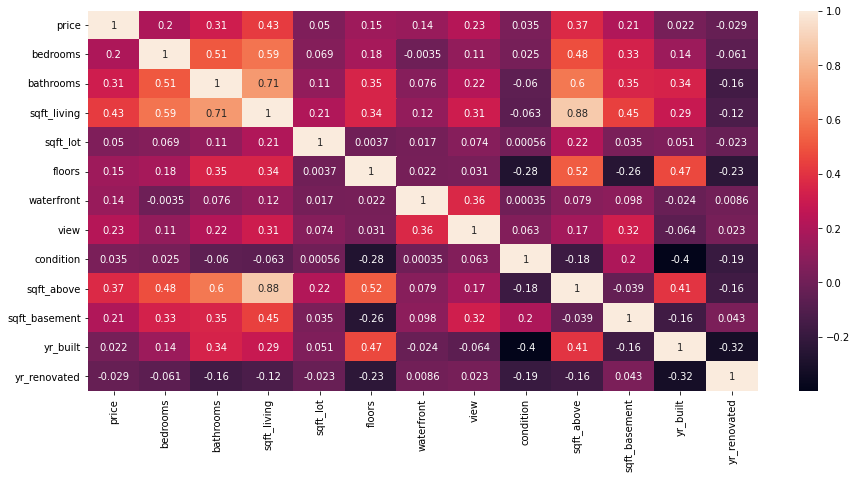

In [149]:
# Check the correlation to price. Negative correlation is ok to drop
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot = True)
plt.show()

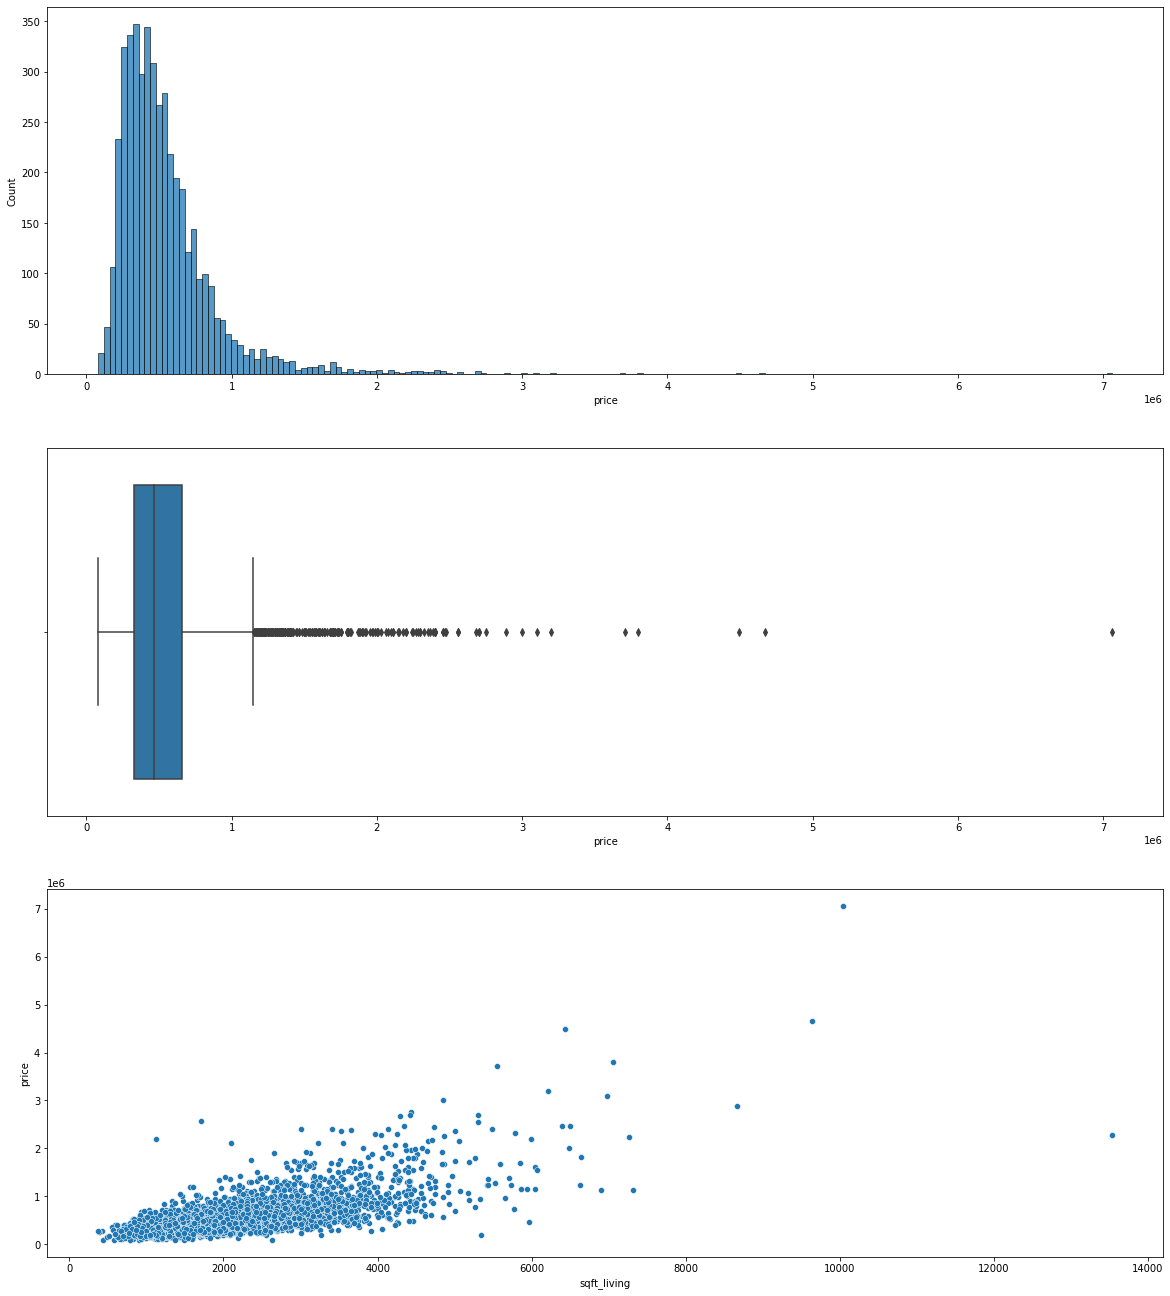

In [193]:
# Data spread by Price

f,ax = plt.subplots(3,1,figsize=(20,23))
sns.histplot(x = 'price',data=data, ax=ax[0])
sns.boxplot(x = 'price',data=data, ax=ax[1])
sns.scatterplot(x= 'sqft_living',y = 'price',data=data, ax=ax[2])

In [151]:
# Data with inconsistent values
data.loc[(data['price'] == 0)].head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3.0,2.0,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4356,2014-05-05 00:00:00,0.0,4.0,3.0,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4357,2014-05-05 00:00:00,0.0,6.0,3.0,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4358,2014-05-06 00:00:00,0.0,5.0,4.0,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4361,2014-05-07 00:00:00,0.0,5.0,2.0,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA


In [152]:
# Data with inconsistent values
data.loc[(data['bedrooms'] == 0)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2365,2014-06-12 00:00:00,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,WA 98102,USA
3209,2014-06-24 00:00:00,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,WA 98053,USA


In [153]:
# Check houses the outliers (most expensive)
data.sort_values(by=['price'],ascending=False).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4350,2014-07-03 00:00:00,26590000.0,3.0,2.0,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA
4346,2014-06-23 00:00:00,12899000.0,3.0,2.0,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,WA 98199,USA
2286,2014-06-11 00:00:00,7062500.0,5.0,4.0,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,WA 98004,USA
2654,2014-06-17 00:00:00,4668000.0,5.0,7.0,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,WA 98040,USA
2761,2014-06-18 00:00:00,4489000.0,4.0,3.0,6430,27517,2.0,0,0,3,6430,0,2001,0,1149-1199 91st Ave NE,Bellevue,WA 98004,USA


In [154]:
# Comparing feature of the most expensive price with the same house in their neighborhood 
data.loc[(data['statezip']== 'WA 98031')].sort_values(by=['price'],ascending=False).head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4350,2014-07-03 00:00:00,26590000.0,3.0,2.0,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA
1152,2014-05-22 00:00:00,430000.0,4.0,3.0,3220,8936,2.0,0,0,3,2450,770,1990,2009,20301 96th Ave S,Kent,WA 98031,USA
3580,2014-06-27 00:00:00,399950.0,3.0,2.0,2570,10431,2.0,0,0,3,2570,0,1989,0,9531 S 204th Pl,Kent,WA 98031,USA


In [155]:
# Comparing feature of 2nd most expensive price with the same house in their neighborhood
seattle_expensive = data.loc[(data['statezip']=='WA 98199')]
seattle_expensive['price'] = seattle_expensive['price'].round(decimals=2)
seattle_expensive.sort_values(by=['price'],ascending=False).head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4346,2014-06-23 00:00:00,12899000.00,3.0,2.0,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,WA 98199,USA
4465,2014-06-05 00:00:00,2560498.33,3.0,2.0,1710,1664,2.0,0,0,5,1300,410,2003,0,2826 21st Ave W,Seattle,WA 98199,USA
1355,2014-05-27 00:00:00,1655000.00,4.0,4.0,3080,4815,2.0,0,3,3,2300,780,1937,2009,2441-2499 Crane Dr W,Seattle,WA 98199,USA
2767,2014-06-18 00:00:00,1400000.00,3.0,2.0,2020,5500,1.5,0,3,3,1790,230,1937,1999,2340 Magnolia Blvd W,Seattle,WA 98199,USA
3499,2014-06-26 00:00:00,1387800.00,3.0,3.0,2480,5500,2.0,0,3,3,1730,750,1950,2005,2855 36th Ave W,Seattle,WA 98199,USA


In [156]:
# Check houses the outliers (cheapest)
data.sort_values(by=['price']).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4472,2014-06-09 00:00:00,0.0,4.0,4.0,4060,19290,2.0,0,0,3,4060,0,2002,0,21418 SE 5th Pl,Sammamish,WA 98074,USA
4542,2014-06-25 00:00:00,0.0,5.0,4.0,2640,6895,2.0,0,0,3,2640,0,2001,0,34529 SE Jay Ct,Snoqualmie,WA 98065,USA
4481,2014-06-11 00:00:00,0.0,5.0,3.0,3240,6863,2.0,0,0,3,3240,0,2013,1923,1301-1303 Monterey Ave NE,Renton,WA 98056,USA
4408,2014-05-21 00:00:00,0.0,5.0,2.0,2880,11965,2.0,0,0,4,2880,0,1990,0,25437 163rd Pl SE,Covington,WA 98042,USA
4411,2014-05-22 00:00:00,0.0,5.0,2.0,2000,7900,1.0,0,0,4,1300,700,1986,0,3202 S 194th St,SeaTac,WA 98188,USA


In [157]:
# Create dataframe of missing datapoint by appending price = 0 and bedrooms = 0
missing = data.loc[(data['price'] == 0)].append(data.loc[(data['bedrooms'] == 0)])
# Create list that contains index of error datapoint
missing_index_list = missing.reset_index()['index'].to_list()
# Insert index of outliers
missing_index_list.extend([4351,4346,4350])
# Drop error datapoint
data = data.drop(missing_index_list,axis=0)

# Regression Modeling

In [175]:
# Split data to X for variable input, and y for target class
X = data.drop(['date','yr_renovated','country','price','street'],axis=1)
y = data['price']

In [176]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [177]:
# Encode
encoder = LabelEncoder()

features = X.select_dtypes(include=['object','bool']).columns
cat = list(features.values)
for i in cat:
  X_train[i] = encoder.fit_transform(X_train[i])
  X_test[i] = encoder.fit_transform(X_test[i])

## Linear Regression

In [178]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print('coef of determination training ', reg.score(X_train, y_train))
print('coef of determination testing ', reg.score(X_test, y_test))
print()
print('coefficient')
print(reg.coef_)
print()
print('intercept')
print(reg.intercept_)
print()
print('prediction')
reg_pred = reg.predict(X_test)
print(reg_pred[:10])
print()
print('real value')
print(y_test[0:10].to_list())
print()
reg_mae = reg.predict(X_train)
print('Mean Absolute Error: ',mean_absolute_error(y_train, reg_mae))

coef of determination training  0.5892275665165178
coef of determination testing  0.5657701140919591

coefficient
[-5.80274658e+04  4.28407488e+04  1.84936961e+02 -6.18254853e-01
  5.74428753e+04  4.50773944e+05  5.91155625e+04  2.76597860e+04
  1.07450502e+02  7.74864581e+01 -2.66857154e+03  2.98718251e+03
 -1.32824428e+03]

intercept
5091917.504280424

prediction
[1354769.22881482  239086.67433601  623847.38357917  312897.53423242
  541314.94110538  517453.20715939  320724.57220886  644780.51635263
  466055.62450523  527968.03988782]

real value
[1225000.0, 401000.0, 612500.0, 375000.0, 615000.0, 432000.0, 200000.0, 580000.0, 530000.0, 350000.0]

Mean Absolute Error:  153506.79095029904


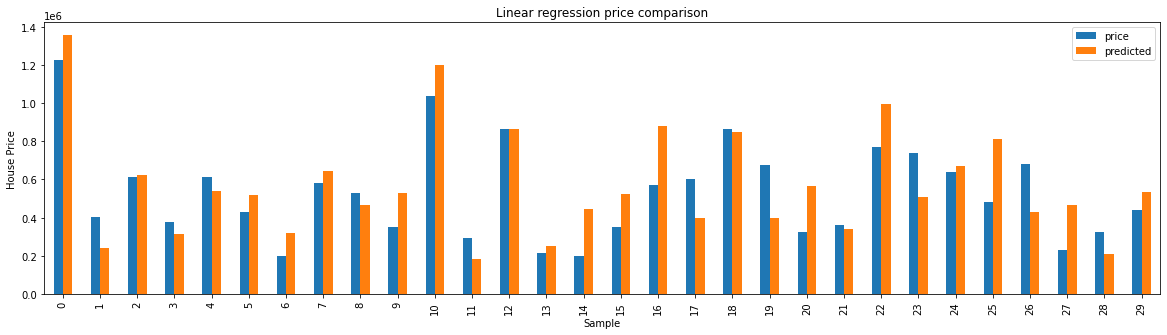

In [179]:
reg_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
reg_pred_price = pd.DataFrame(reg_pred[:30], columns = ['predicted'])
reg_result = pd.concat([reg_real_price, reg_pred_price], axis=1) 
reg_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Linear regression price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

## Laso

In [180]:
las = Lasso(alpha=0.5)
las.fit(X_train, y_train)

print('coef of determination training ', las.score(X_train, y_train))
print('coef of determination testing ', las.score(X_test, y_test))
print()
print('coefficient')
print(las.coef_)
print()
print('intercept')
print(las.intercept_)
print()
print('prediction')
las_pred = las.predict(X_test)
print(las_pred[:10])
print()
print('real value')
print(y_test[0:10].to_list())
print()
laso_mae = las.predict(X_train)
print('Mean Absolute Error: ',mean_absolute_error(y_train, laso_mae))

coef of determination training  0.5892275662181953
coef of determination testing  0.5657695686596337

coefficient
[-5.80268075e+04  4.28389961e+04  3.10427617e+02 -6.18258205e-01
  5.74399123e+04  4.50692821e+05  5.91180583e+04  2.76582221e+04
 -1.80383231e+01 -4.80040141e+01 -2.66856834e+03  2.98721517e+03
 -1.32824647e+03]

intercept
5091918.467912568

prediction
[1354772.53771073  239087.59746441  623848.33188404  312897.45152446
  541316.66691314  517451.58977571  320723.38189534  644781.49990049
  466056.56434736  527966.7810582 ]

real value
[1225000.0, 401000.0, 612500.0, 375000.0, 615000.0, 432000.0, 200000.0, 580000.0, 530000.0, 350000.0]

Mean Absolute Error:  153506.7842511837


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.547e+13, tolerance: 4.562e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


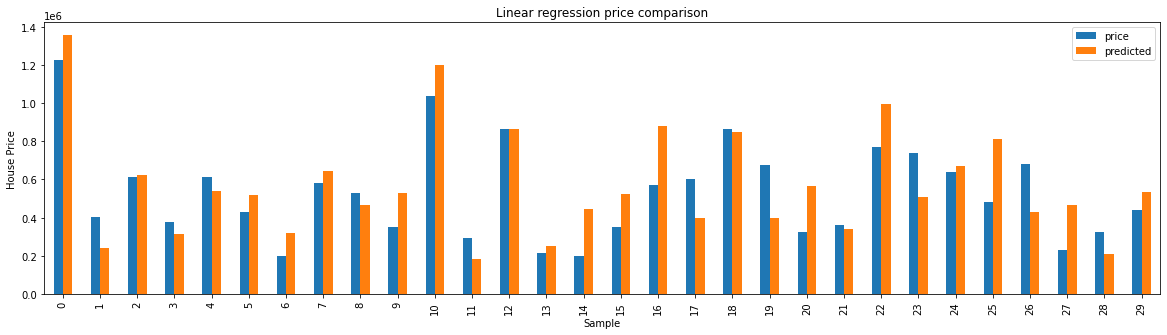

In [181]:
las_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
las_pred_price = pd.DataFrame(las_pred[:30], columns = ['predicted'])
las_result = pd.concat([las_real_price, las_pred_price], axis=1) 
las_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Linear regression price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

## Ridge

In [182]:
ri = Ridge(alpha=0.9)
ri.fit(X_train, y_train)

print('coef of determination training ', ri.score(X_train, y_train))
print('coef of determination testing ', ri.score(X_test, y_test))
print()
print('coefficient')
print(ri.coef_)
print()
print('intercept')
print(ri.intercept_)
print()
print('prediction')
ri_pred = ri.predict(X_test)
print(ri_pred[:10])
print()
print('real value')
print(y_test[0:10].to_list())
print()
ri_mae = ri.predict(X_train)
print('Mean Absolute Error: ',mean_absolute_error(y_train, ri_mae))

coef of determination training  0.589210220493991
coef of determination testing  0.5655853695619159

coefficient
[-5.81213825e+04  4.27897699e+04  1.84987942e+02 -6.18685513e-01
  5.73390257e+04  4.30237662e+05  5.99166159e+04  2.76003130e+04
  1.07594441e+02  7.73929110e+01 -2.67015599e+03  2.99385290e+03
 -1.33198989e+03]

intercept
5095437.8706202675

prediction
[1354986.72270181  239037.28558953  623875.85508936  312943.73701642
  541330.00846757  517457.34163455  320672.88968265  644777.71098211
  466059.35710093  527736.88626718]

real value
[1225000.0, 401000.0, 612500.0, 375000.0, 615000.0, 432000.0, 200000.0, 580000.0, 530000.0, 350000.0]

Mean Absolute Error:  153492.6882306647


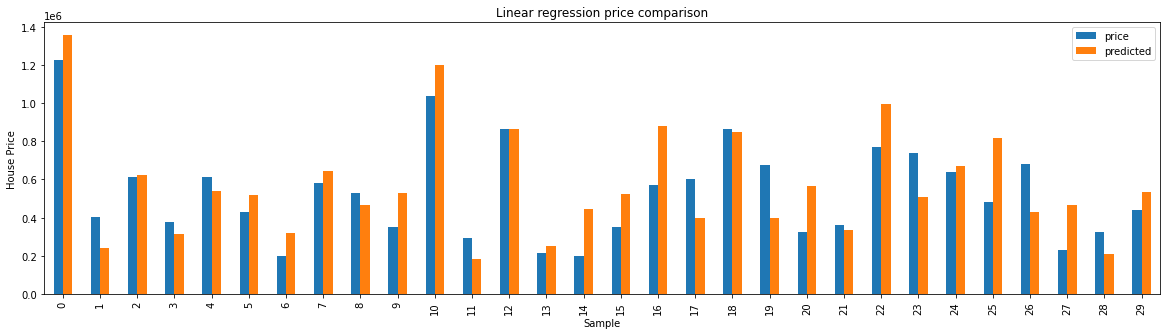

In [183]:
ri_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
ri_pred_price = pd.DataFrame(ri_pred[:30], columns = ['predicted'])
ri_result = pd.concat([ri_real_price, ri_pred_price], axis=1) 
ri_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Linear regression price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

## DecissionTree

In [184]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
  model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, max_depth=17)
  model.fit(X_train, y_train)
  preds_val = model.predict(X_test)
  mae = mean_absolute_error(y_test, preds_val)
  return(mae)

In [185]:
for max_leaf_nodes in [10,11, 12, 13]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 10  		 Mean Absolute Error:  169146
Max leaf nodes: 11  		 Mean Absolute Error:  171869
Max leaf nodes: 12  		 Mean Absolute Error:  169194
Max leaf nodes: 13  		 Mean Absolute Error:  172168


In [186]:
dt = DecisionTreeRegressor(max_depth=18,max_leaf_nodes=10)
dt.fit(X_train, y_train)

print('coef of determination training ',dt.score(X_train, y_train))
print('coef of determination testing ',dt.score(X_test, y_test))
print()
print('prediction')
dt_pred = dt.predict(X_test)
print(dt_pred[:10])
print()
print('real value')
print(y_test[0:10].to_list())
print()
dt_mae = dt.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, dt_mae))

coef of determination training  0.5873905241914885
coef of determination testing  0.14082561910285352

prediction
[1412490.54022989  384968.92059161  549419.93184698  384968.92059161
  549419.93184698  384968.92059161  384968.92059161  777258.828125
  384968.92059161  549419.93184698]

real value
[1225000.0, 401000.0, 612500.0, 375000.0, 615000.0, 432000.0, 200000.0, 580000.0, 530000.0, 350000.0]

Mean Absolute Error:  165987.67132256826


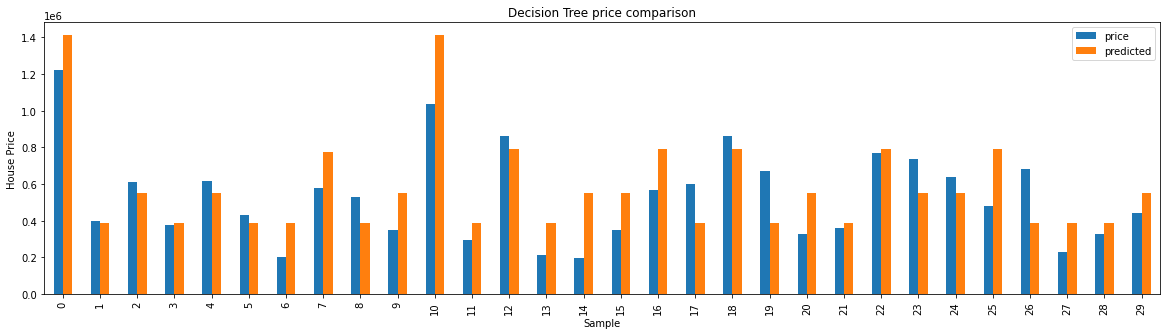

In [192]:
dt_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
dt_pred_price = pd.DataFrame(dt_pred[:30], columns = ['predicted'])
dt_result = pd.concat([dt_real_price, dt_pred_price], axis=1) 
dt_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Decision Tree price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

## Random Forest

In [188]:
rf = RandomForestRegressor(max_depth=10)
rf.fit(X_train, y_train)

print('coef of determination training ',rf.score(X_train, y_train))
print('coef of determination testing ',rf.score(X_test, y_test))
print()
print('prediction')
rf_pred = rf.predict(X_test)
print(rf_pred[:10])
print()
print('real value')
print(y_test[0:10].to_list())
print()
rf_mae = rf.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, rf_mae))

coef of determination training  0.8996293097131653
coef of determination testing  0.5825248641582441

prediction
[1303259.43378662  360700.53446761  594144.82685132  330149.45310674
  563077.40042014  481516.12929108  264296.67520081  773364.61679635
  540082.24995473  345746.94494218]

real value
[1225000.0, 401000.0, 612500.0, 375000.0, 615000.0, 432000.0, 200000.0, 580000.0, 530000.0, 350000.0]

Mean Absolute Error:  82009.4561657903


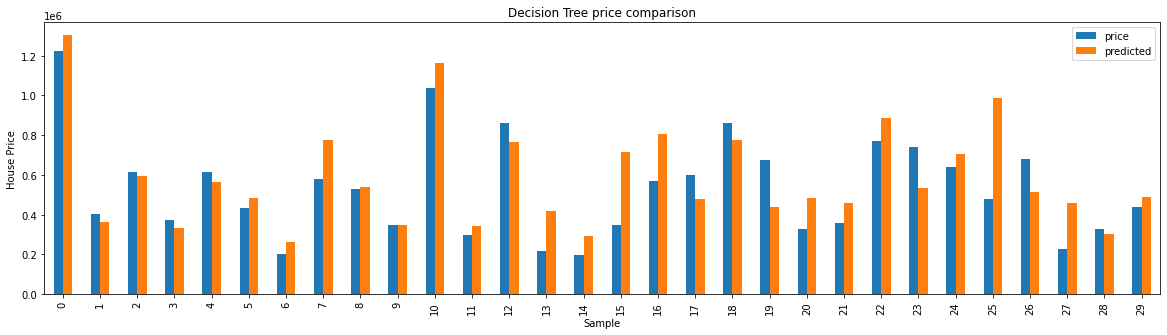

In [189]:
rf_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
rf_pred_price = pd.DataFrame(rf_pred[:30], columns = ['predicted'])
rf_result = pd.concat([rf_real_price, rf_pred_price], axis=1) 
rf_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Decision Tree price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

## MLP Regressor

In [190]:
mlpr = MLPRegressor()
mlpr.fit(X_train, y_train)

print('coef of determination training ',mlpr.score(X_train, y_train))
print('coef of determination testing ',mlpr.score(X_test, y_test))
print()
print('prediction')
mlpr_pred = mlpr.predict(X_test)
print(mlpr_pred[:10])
print()
print('real value')
print(y_test[0:10].to_list())
print()
mlpr_mae = mlpr.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, mlpr_mae))

coef of determination training  0.47614427692598904
coef of determination testing  0.489215373180272

prediction
[1191235.56042811  353492.11500001  696237.00488408  263356.74995889
  603106.20987065  543333.19921629  340703.77126827  555909.89755341
  449886.19443211  675052.37622656]

real value
[1225000.0, 401000.0, 612500.0, 375000.0, 615000.0, 432000.0, 200000.0, 580000.0, 530000.0, 350000.0]

Mean Absolute Error:  172150.95048944184


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


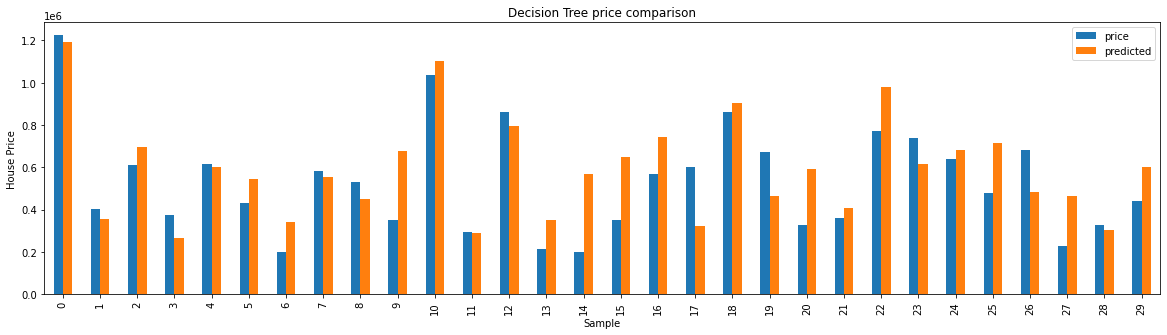

In [191]:
mlpr_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
mlpr_pred_price = pd.DataFrame(mlpr_pred[:30], columns = ['predicted'])
mlpr_result = pd.concat([mlpr_real_price, mlpr_pred_price], axis=1) 
mlpr_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Decision Tree price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()